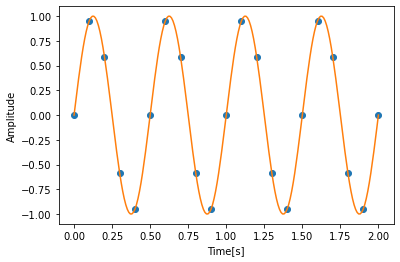

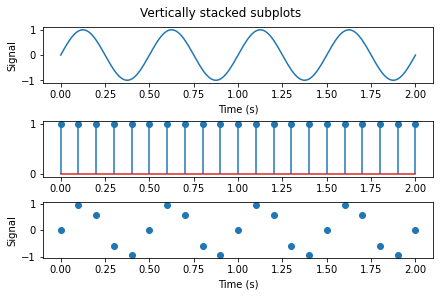

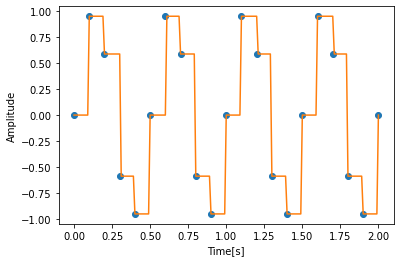

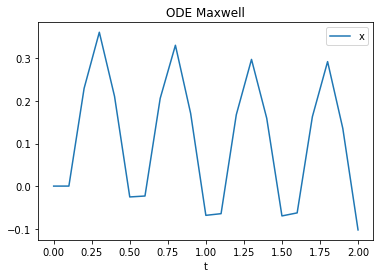

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

#define excitation varibales
f_s = 10               # Sample frequency
T_s = 1/f_s             # Sampling time
T = 2                  # Time interval of total test
f_I = 2                 # Excitation frequency
phi =0            # Signal phase
nCT = 10                # Oversampling points for continuous time plots

NDT=T*f_s               # Number of discrete points
NCT=T*f_s*nCT           # Number of cointinuous point
t_DT= np.arange(0, T+T_s, T_s)              # Discrete-time vector
t_CT= np.arange(0, T+(T_s/nCT), (T_s/nCT))  # Continuous-time vector

def sine (period):
    return np.sin(period)

u_DT=sine(2*np.pi*f_I*t_DT+phi)
u_CT=sine(2*np.pi*f_I*t_CT+phi)

plt.plot(t_DT, u_DT, "o", t_CT, u_CT, "-")
#ax3.suptitle('Continuous signal with sampled points')
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.show()

fig2, (ax0, ax1,ax2) = plt.subplots(3, 1, layout='constrained')
fig2.suptitle('Vertically stacked subplots')
ax0.plot(t_CT, u_CT,'-')
ax1.stem(t_DT,np.ones(np.size(t_DT)))
ax2.plot(t_DT,u_DT,'o')

for ax in ax0,ax2:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Signal')

plt.show()

def DAC_0(u_discrete, sample_time, time_range):
    u_test = []
    for i in range(len(time_range)):
        x = int(time_range[i]//sample_time)
        u_test.append(u_discrete[x])
    return np.array(u_test)


# run the function
u_T = DAC_0(u_DT, T_s, t_CT)

# Alternative calculation of u_t, by use of scipy interpolation, kind is 0,2 and all odd numbers
u_interp=interp1d(t_DT,u_DT,kind=0)
u_t_interp = u_interp(t_CT)

plt.plot(t_DT, u_DT, "o", t_CT, u_t_interp, "-")
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.show()

def gamma_dot(t):
    return u_interp(t)

# waarom moet je de waardes voor
# tau_dot=G*gamma_dot(t) -1/lambda *tau
def ODE_maxwell(t, tau, L,G):

    return G*gamma_dot(t) - tau/L

sol = solve_ivp(ODE_maxwell, [0, T], [0], args=(1.5, 2.5), t_eval=t_DT)

plt.plot(np.squeeze(t_DT), np.squeeze(sol.y))
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=False)
plt.title('ODE Maxwell')
plt.show()

In [48]:
import math
import sys

def find_lcm(f_0, end_range):
    lcm = f_0
    for i in range(2, end_range + 1):
        lcm = math.lcm(lcm, f_0 * i)
    return lcm

def is_divisible(N, f_0, i):
    # Check if N divided by (f_0 * i) has no remainder
    return N % (f_0 * i) == 0

def recommend_N(f_0, N, end_range):
    recommended_N_larger = N
    recommended_N_smaller = N

    # Search for the closest suitable N in both directions
    while not (any(is_divisible(recommended_N_larger, f_0, i) for i in range(1, end_range + 1)) or any(is_divisible(recommended_N_smaller, f_0, i) for i in range(1, end_range + 1))):
        recommended_N_larger += 1
        recommended_N_smaller -= 1

    # Choose the closest suitable N
    if any(is_divisible(recommended_N_larger, f_0, i) for i in range(1, end_range + 1)) and any(is_divisible(recommended_N_smaller, f_0, i) for i in range(1, end_range + 1)):
        recommended_N = recommended_N_larger if abs(N - recommended_N_larger) < abs(N - recommended_N_smaller) else recommended_N_smaller
    elif any(is_divisible(recommended_N_larger, f_0, i) for i in range(1, end_range + 1)):
        recommended_N = recommended_N_larger
    else:
        recommended_N = recommended_N_smaller

    print(f"The recommended N for divisibility by ({f_0} * i) for i in the range 1 to {end_range} around {N} is {recommended_N}.")

    # Exit the program if N is not divisible by f_0
    if not any(is_divisible(N, f_0, i) for i in range(1, end_range + 1)):
        exit("Selected N is not divisible by f_0.")
    else:
        print(f"No recommendation needed. The selected value of N is already suitable.")

def recommend_N_function(f_0, N, end_range):
    return(recommend_N(f_0, N, end_range))

# Example usage:
f_0 = 10
N = 6005
end_range = 7

# Call the function with your chosen values
recommend_N_function(f_0, N, end_range)



The recommended N for divisibility by (10 * i) for i in the range 1 to 7 around 6005 is 6000.


In [64]:
import importlib
import Rheosys

importlib.reload(Rheosys)
f_0=23
N=100
end_range=4


Rheosys.window(f_0,N,end_range)

print("testen")

import math

def k_value(N,f_s,f_0):
    k=(N*f_0)/f_s
    if  (k).is_integer():
        print(f'With the selected values of N {N}, f_s of {f_s} and a value of f_0 {f_0}')
        print(f'A multiple of k * f_0 fit exectly within the time window, with k beiing {k}')
    else:
        x=math.floor(k)
        N_new=(f_s*x)/f_0
        f_s_new=(N*f_0)/x
        f_0_new=(f_s*x)/N
        print(f'k does not result in an integer with the selected values of N {N}, f_s of {f_s} and a value of f_0 {f_0}')
        print(f'To fit a multiple of k * f_0 in the time window where k is {x}, change either of the values to the following ')
        print(f'N = {N_new}')
        print(f'f_s = {f_s_new}')
        print(f'f_0 = {f_0_new}')


N=15
f_s=11
f_0=1.5
k_value(N,f_s,f_0)


Selected N is not divisible by f_0.
The recommended N for divisibility by (23 * i) for i in the range 1 to 4 around 100 is 92.
To avoid leakage the sampling frequency is advised to be 2116 [Hz]
testen


Selected N is not divisible by f_0.
The recommended N for divisibility by (23 * i) for i in the range 1 to 3 around 120 is 115.
To avoid leakage the sampling frequency is advised to be 2645 [Hz]


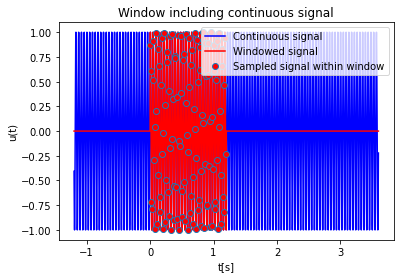

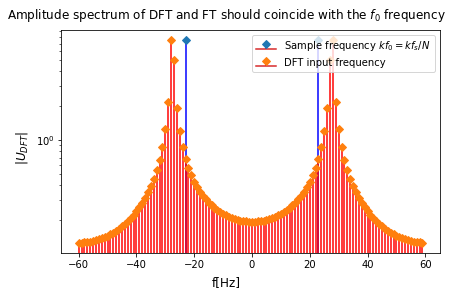

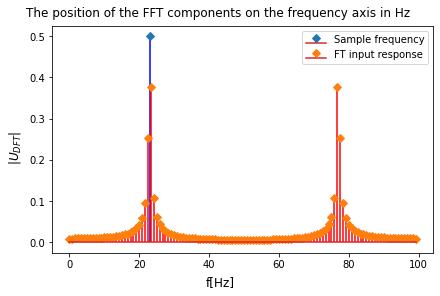

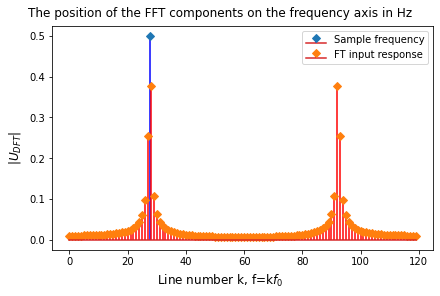

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.fft import fft,fftshift
import Rheosys

def sine (period):
    return np.sin(period)

# To avoid aliasing and leakage, it is advised to determine the N (number of points in the window) and f_s (sampling frequency)
# From that calculate
# f_0=f_s/N = 1/T = 1/T_s*N
# line number k=N*f/f_s
# AVOID leakage: f_s/f_0 must be an integer

#define excitation varibales
f_s = 100                 # Sample frequency
N= 120                    # Number of points
f_0 = 23                 # Excitation frequency

Rheosys.window(f_0,N,3)

NNW= 5e3           # No windowing number
TNW=NNW/f_s             # No windowing time length
phi= np.pi/3            # signal phase
T=N/f_s                 # Time length
Up=100                  # Upsampling for plots

tNW=np.arange((0-T*f_s),(3*T*f_s), (1/(f_s)))   # Time No windowing

uNW= sine(2*np.pi*f_0*tNW+phi)                  # Input signal No windowing
uW= uNW.copy()
uW[tNW<0]=0
uW[tNW>=T]=0                                    # Input signal Windowing

tNWUp=np.arange(-T,3*T,1/(f_s*Up))              # Plot time No Windowing
uNWUp=sine(2*np.pi*f_0*tNWUp+phi)                 # Plot input No Windowing
uWUp=uNWUp.copy()
uWUp[tNWUp<0]=0
uWUp[tNWUp>=T]=0                                # Plot input Windowing

td=np.arange(0,T,1/f_s)                     # Sampled Time
ud=sine(2*np.pi*f_0*td+phi)                 # Sampled input signal

Ud=(np.abs(fft(ud)))/N                      # DFT input signal
Udsplit=fftshift(Ud)                             # DFT input signal zero split
dB=(20*Udsplit)
fd=np.linspace(0,f_s,N,endpoint=False)                             # DFT frequency
fdsplit=np.linspace(-np.floor(N/2),-np.floor(N/2)+N,N,endpoint=False)    # DFT frequency zero split
Lines=np.arange(0,N,1)                      # Line numbers after DFT


plt.plot(tNWUp, uNWUp, "b",label=('Continuous signal'))
plt.plot(tNWUp, uWUp, 'r', label=('Windowed signal'))
plt.plot(td, ud,'o',markerfacecolor='red',label='Sampled signal within window')
plt.title('Window including continuous signal')
plt.xlabel('t[s]')
plt.ylabel('u(t)')
plt.legend()
plt.show()

fig0, (ax0) = plt.subplots(1, 1, layout='constrained')
ax0.stem([-f_0,f_0],([max(dB),max(dB)]),linefmt='blue', markerfmt='D',label='Sample frequency $kf_0=kf_s/N$')
ax0.stem(fdsplit,(dB),linefmt='red', markerfmt='D',label='DFT input frequency')
fig0.suptitle('Amplitude spectrum of DFT and FT should coincide with the $f_0$ frequency')
fig0.supxlabel('f[Hz]')
fig0.supylabel('$|U_{DFT}|$')
ax0.set_yscale('log')
ax0.legend()

fig1, (ax1) = plt.subplots(1, 1, layout='constrained')
fig1.suptitle('Vertically stacked subplots')
ax1.stem(f_0,0.5,linefmt='blue', markerfmt='D',label='Sample frequency')
ax1.stem(fd,Ud,linefmt='red', markerfmt='D',label='FT input response')
fig1.suptitle('The position of the FFT components on the frequency axis in Hz ')
fig1.supxlabel('f[Hz]')
fig1.supylabel('$|U_{DFT}|$')
ax1.legend()

fig2, (ax2) = plt.subplots(1, 1, layout='constrained')
fig2.suptitle('Vertically stacked subplots')
ax2.stem(f_0*T,0.5,linefmt='blue', markerfmt='D',label='Sample frequency')
ax2.stem(Lines,Ud,linefmt='red', markerfmt='D',label='FT input response')
fig2.suptitle('The position of the FFT components on the frequency axis in Hz')
fig2.supxlabel('Line number k, f=k$f_0$')
fig2.supylabel('$|U_{DFT}|$')
ax2.legend()



plt.show()


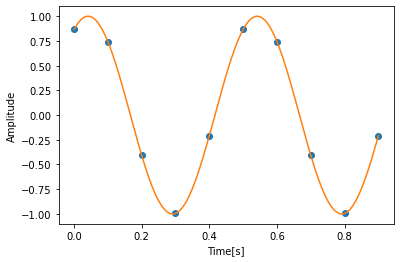

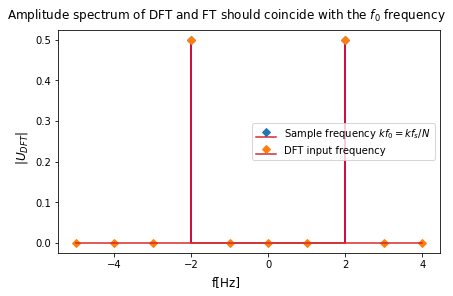

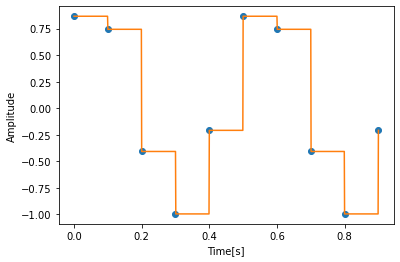

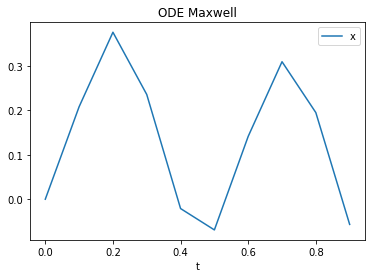

[[ 0.          0.20790956  0.37544355  0.23545998 -0.02098435 -0.06903769
   0.14132513  0.30917379  0.19472563 -0.05666516]]


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.fft import fft,fftshift

def sine (period):
    return np.sin(period)

# To avoid aliasing and leakage, it is advised to determine the N (number of points in the window) and f_s (sampling frequency)
# From that calculate
# f_0=f_s/N = 1/T = 1/T_s*N
# line number k=N*f/f_s
# AVOID leakage: f_s/f_0 must be an integer

#define excitation varibales
f_s = 10                 # Sample frequency
N= 10                    # Number of points
f_0 = 2                 # Excitation frequency

phi= np.pi/3            # signal phase
Up=100                  # Upsampling for plots

# Calculation of time window
T=N/f_s                 # Time length
T_s = 1/f_s             # Sampling time
t_DT= np.linspace(0, T,N,endpoint=False)        # Discrete-time vector
t_CT= np.linspace(0, t_DT[-1], N*Up,endpoint=True)  # Continuous-time vector


u_DT=sine(2*np.pi*f_0*t_DT+phi)
u_CT=sine(2*np.pi*f_0*t_CT+phi)

plt.plot(t_DT, u_DT, "o", t_CT, u_CT, "-")
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.show()

### Creation of the
Ud=(np.abs(fft(u_DT)))/N                         # DFT input signal
Udsplit=fftshift(Ud)                             # DFT input signal zero split
dB=-20*np.log(Udsplit)
fd=np.linspace(0,f_s,N,endpoint=False)                             # DFT frequency
fdsplit=np.linspace(-np.floor(N/2),-np.floor(N/2)+N,N,endpoint=False)    # DFT frequency zero split
Lines=np.arange(0,N,1)                      # Line numbers after DFT

fig0, (ax0) = plt.subplots(1, 1, layout='constrained')
ax0.stem([-f_0,f_0],[0.5,0.5],linefmt='blue', markerfmt='D',label='Sample frequency $kf_0=kf_s/N$')
ax0.stem(fdsplit,Udsplit,linefmt='red', markerfmt='D',label='DFT input frequency')
fig0.suptitle('Amplitude spectrum of DFT and FT should coincide with the $f_0$ frequency')
fig0.supxlabel('f[Hz]')
fig0.supylabel('$|U_{DFT}|$')
ax0.legend()
plt.show()



# Calculation of u_t, by use of scipy interpolation, kind is 0,2 and all odd numbers
u_interp=interp1d(t_DT,u_DT,kind=0)
U_DT_int = u_interp(t_CT)

plt.plot(t_DT, u_DT, "o")
plt.plot(t_CT, U_DT_int, "-")
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.show()

def gamma_dot(t):
    return u_interp(t)

# tau_dot=G*gamma_dot(t) -1/lambda *tau
def ODE_maxwell(t, tau, L,G):
    #L,G=args
    return G*gamma_dot(t) - tau/L

sol = solve_ivp(ODE_maxwell, [0, t_DT[-1]], [0], args=(1.5, 2.5), t_eval=t_DT)

plt.plot(np.squeeze(t_DT), np.squeeze(sol.y))
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=False)
plt.title('ODE Maxwell')
plt.show()



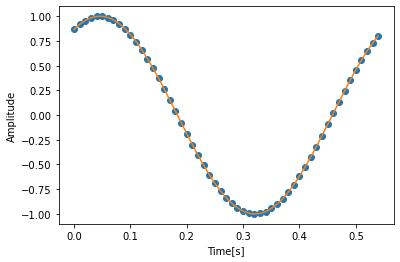

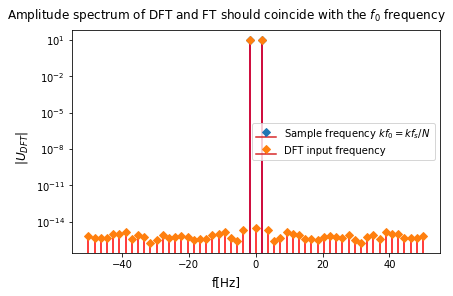

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.fft import fft,fftshift

def sine (period):
    return np.sin(period)

# To avoid aliasing and leakage, it is advised to determine the N (number of points in the window) and f_s (sampling frequency)
# From that calculate
# f_0=f_s/N = 1/T = 1/T_s*N
# line number k=N*f/f_s
# AVOID leakage: f_s/f_0 must be an integer

#define excitation varibales
f_s =100                   # Sample frequency
N= 55                    # Number of points

phi= np.pi/3            # signal phase

NBp = 6                  # Number of block points
Ntotal=N*NBp             # Number of transient points

Up=100                  # Upsampling for plots

# Calculation of time window
f_0 = f_s/N                 # Excitation frequency
k_value= (N*f_0)/f_s
T = N/f_s                 # Time length
T_s = 1/f_s             # Sampling time
t_DT= np.linspace(0, T,N,endpoint=False)        # Discrete-time vector
t_CT= np.linspace(0, t_DT[-1], N*Up,endpoint=True)  # Continuous-time vector

u_DT=sine(2*np.pi*f_0*t_DT+phi)
u_CT=sine(2*np.pi*f_0*t_CT+phi)

plt.plot(t_DT, u_DT, "o", t_CT, u_CT, "-")
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.show()


### Creation of the stem plot
Ud=(np.abs(fft(u_DT)))/N                         # DFT input signal
Udsplit=fftshift(Ud)                             # DFT input signal zero split
dB=20*(Udsplit)
fd=np.linspace(0,f_s,N,endpoint=False)                             # DFT frequency
fdsplit=np.linspace(-np.floor(f_s/2),-np.floor(f_s/2)+f_s,N,endpoint=True)    # DFT frequency zero split

fig0, (ax0) = plt.subplots(1, 1, layout='constrained')
ax0.stem([-f_0,f_0],[max(dB),max(dB)],linefmt='blue', markerfmt='D',label='Sample frequency $kf_0=kf_s/N$')
ax0.stem(fdsplit,dB,linefmt='red', markerfmt='D',label='DFT input frequency')
fig0.suptitle('Amplitude spectrum of DFT and FT should coincide with the $f_0$ frequency')
fig0.supxlabel('f[Hz]')
fig0.supylabel('$|U_{DFT}|$')
ax0.legend()
ax0.set_yscale('log')
plt.show()



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.fft import fft,fftshift
from random import random

def sine (period):
    return np.sin(period)

def DB (arr):
    ref = 1
    decibel=[]
    for i in arr:
        if i!=0:
            decibel.append(20 * np.log10(abs(i) / ref))
        else:
            decibel.append(-60)

    return decibel

def rms(arr):
    rms = np.sqrt(np.mean(np.square(arr)))
    return rms

def crest_fac(frequency):
    return (max(abs(frequency)))/rms(frequency)

def phase_lin(N,f_s,Tau,t):
    return -Tau*2*np.pi*(t/N)*f_s

def phase_rand():
    return np.pi*random()

def phase_schroeder():
    return

# To avoid aliasing and leakage, it is advised to determine the N (number of points in the window) and f_s (sampling frequency)
# From that calculate
# f_0=f_s/N = 1/T = 1/T_s*N
# line number k=N*f/f_s
# AVOID leakage: f_s/f_0 must be an integer

#define excitation varibales
f_s =1000                   # Sample frequency
N= 100                    # Number of points

phi= 0            # signal phase
kind=0              #interpolation kind

NBp = 6                  # Number of block points
Ntotal=N*NBp             # Number of transient points

Up=100                  # Upsampling for plots

# Calculation of time window
f_0 = 25*f_s/N                 # Excitation frequency
k_value= (N*f_0)/f_s
T = N/f_s                 # Time length
T_s = 1/f_s             # Sampling time
t_DT= np.linspace(0, T,N,endpoint=False)        # Discrete-time vector
t_CT= np.linspace(0, t_DT[-1], N*Up,endpoint=True)  # Continuous-time vector

u_DT=sine(2*np.pi*f_0*t_DT+phi)
u_CT=sine(2*np.pi*f_0*t_CT+phi)


### Calculation of fourier transform in frequency distribution
Ud=(np.abs(fft(u_DT)))/N                         # DFT input signal
Udsplit=fftshift(Ud)                             # DFT input signal zero split
fd=np.linspace(0,f_s,N,endpoint=False)                             # DFT frequency
fdsplit=np.linspace(-np.floor(f_s/2),-np.floor(f_s/2)+f_s,N,endpoint=False)    # DFT frequency zero split

# Reconstruction of signal between sample points, use of scipy interpolation, kind is 0,2 and all odd numbers
u_interp=interp1d(t_DT,u_DT,kind=kind)
U_DT_int = u_interp(t_CT)

# Solving of the maxwell differentail equation
def gamma_dot(t):
    return u_interp(t)

# tau_dot=G*gamma_dot(t) -1/lambda *tau
def ODE_maxwell(t, tau, L,G):
    #L,G=args
    return G*gamma_dot(t) - tau/L

sol_Block = solve_ivp(ODE_maxwell, [0, t_DT[-1]], [0], args=(1.5,2.5), t_eval=t_DT)


Lines=np.arange(1,np.floor(Ntotal/2),1)


X=np.zeros((1,Ntotal))

X(Lines)=np.exp(np.imag*random())
print(X)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


In [22]:
y=np.cos(np.deg2rad(25))
Fny=y*65*9.81
Fs=0.7*Fny

x=np.sin(np.deg2rad(25))
Fnx=x*65*9.81

Fv=0.5*65*(75/3.6)**2
d=Fv/(Fs-Fnx)

print(Fny,'Fny',Fnx,'Fnx',Fs,'Fs')
print(Fv)
print(14105/(404-269))
print(d)

577.9071604039199 Fny 269.482534598957 Fnx 404.5350122827439 Fs
14105.902777777776
104.48148148148148
104.44756749154551


Crest factor: 6.02 dB


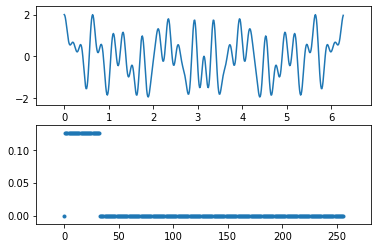

In [23]:
from numpy import (pi, zeros, empty, arange, sqrt, exp, log10, amax,
                   linspace, mean, absolute)
from numpy.random import random
from numpy.fft import rfft, rfftfreq, irfft


# Originally from matplotlib.mlab:
def rms_flat(a):
    """
    Return the root mean square of all the ele ments of *a*, flattened out.
    """
    return sqrt(mean(absolute(a)**2))


def rudinshapiro(N):
    """
    Return first N terms of Rudin-Shapiro sequence.
    https://en.wikipedia.org/wiki/Rudin-Shapiro_sequence
    Confirmed correct output to N = 10000:
    https://oeis.org/A020985/b020985.txt
    """
    def hamming(x):
        """
        Hamming weight of a binary sequence.
        http://stackoverflow.com/a/407758/125507
        """
        return bin(x).count('1')

    out = empty(N, dtype=int)
    for n in range(N):
        b = hamming(n << 1 & n)
        a = (-1)**b
        out[n] = a

    return out


def multitone(type, fs, length, N=None, N0=1):
    """
    Return a multitone signal of given type.
    fs = sampling rate
    length = length in samples
    N = number of tones
    N0 = starting tone
    """
    if N is None:
        N = length//2

    if type == 'impulse':
        """
        Zero-phase method
        Figure 1
        Worst crest factor possible (18 dB for N=32)
        """
        phase = zeros(N)

    elif type == 'random':
        """
        Random phase method
        Noise, with crest factor on order of sqrt(log(N)) (5 dB for N=32)
        """
        phase = random(N)*2*pi

    elif 'rudin' in type:
        """
        Rudin-Shapiro sequence method
        Figure 4
        Noise-like, with crest factor under 6 dB when N is a power of 2.
        """
        phase = -pi*rudinshapiro(N)
        phase[phase == -pi] = 0

    elif 'newman' in type:
        """
        Newman method
        Figure 6
        Sweep-like, with crest factor about 4.6 dB at higher N
        """
        k = arange(N) + N0
        phase = (pi*(k-1)**2)/N
        if type in {'newmanreversed', 'newman_r'}:
            phase = phase[::-1]

    # # Explicit construction
    # t = linspace(0, 2*pi, length, endpoint=False)
    # sig = zeros_like(t)
    # for k in arange(N)+N0:
    #     sig += cos(k*t + phase[k-N0])
    # sig *= sqrt(2/N)

    # Inverse FFT construction
    f = zeros(length//2+1, dtype=complex)
    for k in arange(N)+N0:
        f[k] = exp(1j*phase[k-N0])
    sig = irfft(f, length) * length/2 * sqrt(2/N)

    return sig


if __name__ == '__main__':
from matplotlib import pyplot as plt

    # sampling rate
    fs = 512

    length = fs*1  # seconds

    # impulse, random, rudin, newman
    type = 'rudin'

    # number of tones
    N = 32

    # Starting tone
    N0 = 1

    sig = multitone(type, fs, length, N, N0)

    crest_factor = 20*log10(amax(abs(sig))/rms_flat(sig))
    print('Crest factor: {0:.2f} dB'.format(crest_factor))

    t = linspace(0, 2*pi, length, endpoint=False)
    plt.subplot(2, 1, 1)
    plt.plot(t, sig)
    plt.margins(0.1, 0.1)

    # Use FFT to get the amplitude of the spectrum
    ampl = 1/fs * abs(rfft(sig))

    # FFT frequency bins
    freqs = rfftfreq(fs, 1/fs)

    plt.subplot(2, 1, 2)

    plt.plot(freqs, ampl, '-')
    plt.margins(0.1, 0.1)

1.0 ii
2.0 ii
3.0 ii


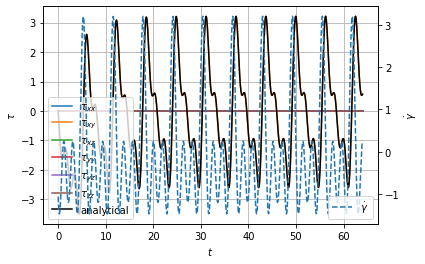

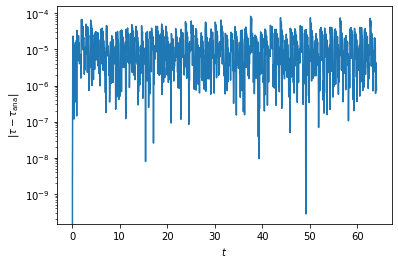

In [3]:
import numpy as np

# unit tensor
I  = np.identity(3)

# determine the stress
# NOTE: shape of conf is [nsteps,6], with 6 for the six components
def get_stress(conf,params):
    stress = np.zeros([conf.shape[0],6])
    if params["nonlin"]:
        stress[:,[0,3,5]] = stress[:,[0,3,5]] + params["G"]*(conf[:,[0,3,5]]-1)
        stress[:,[1,2,4]] = stress[:,[1,2,4]] + params["G"]*(conf[:,[1,2,4]])
    else:
        stress[:,:] = params["G"]*conf[:,:]
    return stress

# upper convected derivative
def UCD(cc,L):
    return np.matmul(L,cc)+np.matmul(cc,np.transpose(L))

# relaxation function for the UCM model
def rlx(cc,params):
    return (-1/params["lam"])*(cc-I)

# the RHS of the viscoelastic evolution equation
def veRHS(time, cvec, *args):

    # unpack the extra arguments
    params, get_rate = args

    # set the current rate in the velocity gradient tensor
    Lmat = np.zeros((3,3))
    Lmat[0,1] = get_rate(time) # assume simple shear

    # calculate the RHS
    if params["nonlin"]:

        # unpack the vector
        cxx, cxy, cxz, cyy, cyz, czz  = cvec

        # put the 6 values in a 3x3 symmetrix matrix
        cmat = np.array([[cxx,cxy,cxz],[cxy,cyy,cyz],[cxz,cyz,czz]])

        # determine the RHS of the UCM model
        rhsmat = UCD(cmat,Lmat) + rlx(cmat,params)

        # return the 3x3 in a 6 vector
        rhsvec = np.array([rhsmat[0,0],rhsmat[0,1],rhsmat[0,2],
                           rhsmat[1,1],rhsmat[1,2],rhsmat[2,2]])

    else:

        # determine the rate of deformation tensor
        Dmat = (Lmat + np.transpose(Lmat))/2

        # put the symmetric elements of D in a 6 vector
        Dvec = np.array([Dmat[0,0],Dmat[0,1],Dmat[0,2],
                         Dmat[1,1],Dmat[1,2],Dmat[2,2]])

        # calculate the RHS for the linear Maxwell model
        rhsvec = 2*Dvec - cvec / params["lam"]

    return rhsvec

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


# set the material parameters
params = {'lam'      : 4.0,
          'G'        : 2.0,
          'nonlin'   : False}

frequencies       = np.array([1.0, 2.0, 3.0]) # frequencies
strain_amplitudes = np.array([1.0, 0.5, 0.4]) # strain amplitudes
phase_shifts      = np.array([1.0, 2.0, 3.0]) # phase shifts

# define the deformation rate as a function of time
def rate(time):
    return (strain_amplitudes*frequencies*np.cos(frequencies*time+phase_shifts)).sum()

# define end-time for integration
t_end = 64

# amount of points in the time domain
npoints = 1000

# points at which solution is determined
tspan = np.linspace(0, t_end, npoints)

# define initial condition
if params["nonlin"]:
    c0 = np.array([1.0, 0.0, 0.0, 1.0, 0.0, 1.0])
else:
    c0 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

# perform time integration
out = solve_ivp(veRHS, (0.0,t_end), c0, t_eval=tspan, args=(params,rate),atol=1e-6,rtol=1e-6)

# store the output in a solution array
sol = out.y.T

# get the stress
stress = get_stress(sol,params)

# analytical solution (obtained using file "maxwell_analytical.py")
def maxwell_stress_single_sine(time, strain_amplitude, G, lam, freq, phase_shift):
    transient = np.exp(-time/lam) # set to zero to exclude transient
    print(transient)
    return -G*freq*lam*strain_amplitude* (
        transient*(freq*lam*np.sin(phase_shift) + np.cos(phase_shift)) -
        (freq*lam*np.sin(freq*time + phase_shift) + np.cos(freq*time + phase_shift)) ) / (freq**2*lam**2 + 1)

stress_ana = np.zeros_like(stress)
for ii, freq in enumerate(frequencies):
     stress_ana[:,1] = stress_ana[:,1] + (
          maxwell_stress_single_sine(tspan, strain_amplitudes[ii], params['G'], params['lam'], freq, phase_shifts[ii]) )
     print(freq,'ii')

# plot the stress and strain rate
labels = ['$\\tau_{xx}$','$\\tau_{xy}$','$\\tau_{xz}$','$\\tau_{yy}$','$\\tau_{yz}$','$\\tau_{zz}$']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for i in range(6): ax1.plot(tspan, stress[:, i],label=labels[i])
ax1.plot(tspan, stress_ana[:, 1],c='black', label='analytical')
ax2.plot(tspan, [rate(t) for t in tspan], '--',label="$\\dot{\\gamma}$")
ax1.grid(True, which="both")
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
ax1.set_xlabel("$t$")
ax1.set_ylabel("$\\tau$")
ax2.set_ylabel("$\\dot{\\gamma}$")
plt.show()

# plot the error of the numerical solution
plt.semilogy(tspan,np.abs(stress[:,1]-stress_ana[:,1]))
plt.xlabel("$t$")
plt.ylabel("$|\\tau-\\tau_\mathrm{ana}|$")
plt.show()



[-3.14159265e+00 -3.15737955e-02 -9.47213865e-02 -1.89442773e-01
 -3.15737955e-01 -4.73606933e-01 -6.63049706e-01 -8.84066274e-01
 -1.13665664e+00 -1.42082080e+00 -1.73655875e+00 -2.08387050e+00
 -2.46275605e+00 -2.87321539e+00 -3.31524853e+00 -3.78885546e+00
 -4.29403619e+00 -4.83079071e+00 -5.39911903e+00 -5.99902115e+00
 -6.63049706e+00 -7.29354676e+00 -7.98817026e+00 -8.71436756e+00
 -9.47213865e+00 -1.02614835e+01 -1.10824022e+01 -1.19348947e+01
 -1.28189610e+01 -1.37346010e+01 -1.46818149e+01 -1.56606026e+01
 -1.66709640e+01 -1.77128993e+01 -1.87864083e+01 -1.98914912e+01
 -2.10281478e+01 -2.21963782e+01 -2.33961825e+01 -2.46275605e+01
 -2.58905123e+01 -2.71850379e+01 -2.85111373e+01 -2.98688106e+01
 -3.12580576e+01 -3.26788784e+01 -3.41312730e+01 -3.56152413e+01
 -3.71307835e+01 -3.86778995e+01 -4.02565893e+01 -4.18668529e+01
 -4.35086902e+01 -4.51821014e+01 -4.68870863e+01 -4.86236451e+01
 -5.03917776e+01 -5.21914840e+01 -5.40227641e+01 -5.58856181e+01
 -5.77800458e+01 -5.97060

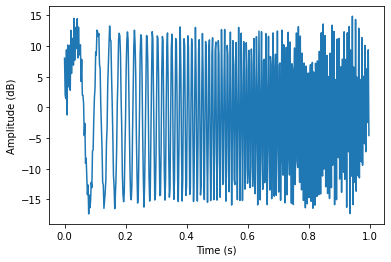

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.fft import fft,fftshift,ifft,ifftshift,rfft,rfftfreq
from scipy import signal
import Rheosys as rhs
import Visualplots
import random

#andom.seed(10)
# To avoid aliasing and leakage, it is advised to determine the N (number of points in the window) and f_s (sampling frequency)
# From that calculate
# f_0=f_s/N = 1/T = 1/T_s*N
# line number k=N*f/f_s
# AVOID leakage: f_s/f_0 must be an integer
#k_value= (N*f_0)/f_s
#define excitation varibales

f_s =480                                         # Sample frequency
N= 480                                           # Number of points

Lambda_constant=1.5                              # Value for lambda n/g
g_constant=2.5                                   # Value for spring constant g

J1=1                                             # Starting frequency multisine
J2=200                                           # Stopping freqency multisine

phi= 0                                           # starting phase
kind=0                                           # interpolation kind

NBp = 6                                          # Number of block points
Ntotal=N*NBp                                     # Number of transient points


Up=100                                           # Upsampling for plots

# Calculation of time window
f_0 = f_s/N                                      # Excitation frequency
T = N/f_s                                        # Time length
t= np.linspace(0, T,N,endpoint=False)            # Time vector
f=np.linspace(0,N,f_s,endpoint=False)            # Frequency range
t_CT= np.linspace(0, t[-1], N*Up,endpoint=True)  # Over sampling continuous-time vector



j1=np.floor(J1)
j2=np.ceil(J2)


#phase = np.random.randn(N)


f_0 = f_s/N                                      # Excitation frequency
T = N/f_s                                        # Time length
t= np.linspace(0, T,N,endpoint=False)            # Time vector
f=np.linspace(0,N,f_s,endpoint=False)            # Frequency range
J=int(j2-j1)
j_range=np.ndarray.astype(np.linspace(j1,j2-1,J),int)
j_range_split=np.ndarray.astype(np.linspace(-j2+1,-j1,J)+np.linspace(j1,j2-1,J),int)
u = np.zeros(len(t))


phase=[]
for i in range(len(j_range)):

    x=-1*(j_range[i])*(j_range[i-1])
    phase = np.append(phase, (x*np.pi)/J)

print(phase)
print(np.size(phase))

for j in range(J):
    u += np.cos(j*t*2*np.pi*f_0 + phase[j])


#for j in j_range:


plt.plot(t,u)
plt.ylabel('Amplitude (dB)')
plt.xlabel('Time (s)')
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, bode

# Define the transfer function coefficients
numerator = [2]
denominator = [1, 0.5]

# Create a TransferFunction object
sys = TransferFunction(numerator, denominator,dt=0.1)

# Frequency range for the plot
omega = np.logspace(-2, 2, 480)  # Adjust the range according to your needs

# Calculate the frequency response
frequency, magnitude, phase = bode(sys, omega)

# Plot the magnitude response in decibels
plt.figure()
plt.plot(frequency, 20 * np.log10(magnitude))
plt.title('Magnitude Response')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.show()

# Plot the phase response
plt.figure()
plt.plot(frequency, phase)
plt.title('Phase Response')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.grid(True)
plt.show()



AttributeError: freqresp can only be used with continuous-time systems.

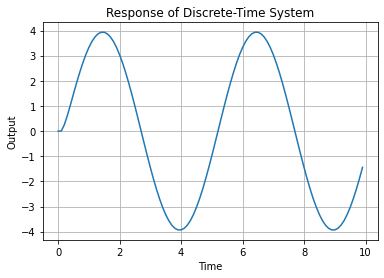

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import dlti, dlsim

# Define the discrete-time transfer function coefficients
numerator = [2]
denominator = [1, -0.5]  # Note the change in the denominator coefficients for discrete-time

# Create a Discrete-Time TransferFunction object
sys = dlti(numerator, denominator, dt=0.1)

# Time vector for simulation
t = np.arange(0, 10, 0.1)

# Input signal (for simulation purposes)
u = np.sin(2 * np.pi * 0.2 * t)

# Perform simulation
t, y = dlsim(sys, u, t)

# Plot the response
plt.plot(t, y)
plt.title('Response of Discrete-Time System')
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid(True)
plt.show()




